In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2

In [2]:
train_dir = "../input/fer2013/train" #passing the path with training images
test_dir = "../input/fer2013/test"   #passing the path with testing images

In [3]:
img_size = 48 #original size of the image

In [4]:
"""
Data Augmentation
--------------------------
rotation_range = rotates the image with the amount of degrees we provide
width_shift_range = shifts the image randomly to the right or left along the width of the image
height_shift range = shifts image randomly to up or below along the height of the image
horizontal_flip = flips the image horizontally
rescale = to scale down the pizel values in our image between 0 and 1
zoom_range = applies random zoom to our object
validation_split = reserves some images to be used for validation purpose
"""

train_datagen = ImageDataGenerator(rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         zoom_range = 0.2,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [5]:
"""
Applying data augmentation to the images as we read 
them from their respectivve directories
"""
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [11]:
"""
Modeling
"""

model = Sequential()
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = 'same',activation = 'relu',input_shape = (img_size,img_size,1)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = 2,strides = 2))

model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = 2,strides = 2))

model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = 2,strides = 2))

model.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = 2,strides = 2))

model.add(Conv2D(filters = 256,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = 2,strides = 2))

model.add(Flatten())
model.add(Dense(units = 128,activation = 'relu',kernel_initializer='normal'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(units = 64,activation = 'relu',kernel_initializer='normal'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(units = 64,activation = 'relu',kernel_initializer='normal'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(7,activation = 'softmax'))

In [12]:
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
optimizer = Adam(lr = 0.001)
model.compile(loss = "categorical_crossentropy",optimizer = optimizer,metrics = ['accuracy'])
epochs = 50
batch_size = 64

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 64)       

In [14]:
history = model.fit(x = train_generator,steps_per_epoch = 22968//64,epochs = epochs,validation_data = validation_generator,validation_steps = 1432//64)

Epoch 1/50
358/358 [==============================] - 34s 92ms/step - loss: 2.2365 - accuracy: 0.1823 - val_loss: 1.8853 - val_accuracy: 0.2457
Epoch 2/50
358/358 [==============================] - 33s 92ms/step - loss: 1.8815 - accuracy: 0.2261 - val_loss: 1.7870 - val_accuracy: 0.2614
Epoch 3/50
358/358 [==============================] - 33s 91ms/step - loss: 1.8206 - accuracy: 0.2413 - val_loss: 1.7752 - val_accuracy: 0.2791
Epoch 4/50
358/358 [==============================] - 33s 92ms/step - loss: 1.7945 - accuracy: 0.2573 - val_loss: 1.7933 - val_accuracy: 0.2543
Epoch 5/50
358/358 [==============================] - 33s 91ms/step - loss: 1.7707 - accuracy: 0.2631 - val_loss: 1.8217 - val_accuracy: 0.2670
Epoch 6/50
358/358 [==============================] - 33s 92ms/step - loss: 1.7605 - accuracy: 0.2701 - val_loss: 1.7554 - val_accuracy: 0.2841
Epoch 7/50
358/358 [==============================] - 33s 91ms/step - loss: 1.7331 - accuracy: 0.2882 - val_loss: 1.7781 - val_accuracy:

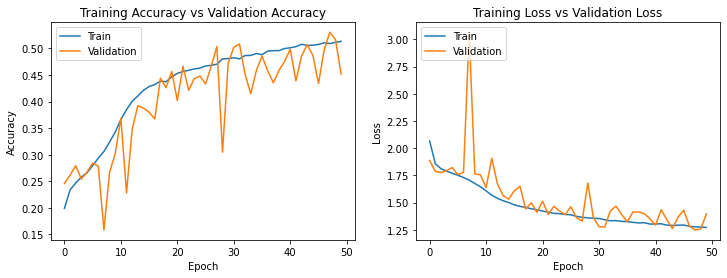

In [15]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()